# Tesla Product Twitter NLP Analysis

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tweepy
#import hidden
import sqlite3
from langdetect import detect
from bs4 import BeautifulSoup

## Authorizing access through a developer account

We can set up keys and tokens at: https://apps.twitter.com/

In [3]:
consumer_key = 'tRby6pJGgzaN1Y9OOFU8nOzCV'
consumer_secret = 'aL7BAVZ4UwBQ1HyffIxsCG2da8BdJTcFD3WziDe3mePFFLoA2u'
access_token = '18666236-DmDE1wwbpvPbDcw9kwt9yThGeyYhjfpVVywrHuhOQ'
access_token_secret = 'cttbpxpTtqJn7wrCP36I59omNI5GQHXXgV41sKwUgc'

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

## Get all tweets from a given user

In [59]:
id = 'teslamodel3fan'
new_tweets = api.user_timeline(screen_name = id,count=50)
print(len(new_tweets))
print(new_tweets)

50
[Status(_api=<tweepy.api.API object at 0x115342860>, _json={'created_at': 'Thu Nov 01 23:24:41 +0000 2018', 'id': 1058137785171894272, 'id_str': '1058137785171894272', 'text': "Psyched for the @karaswisher interview. Guess I'm kinda glad she didn't remove Twitter from his phone 😁 https://t.co/6D0Bh5ARB8", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'karaswisher', 'name': 'Kara Swisher', 'id': 5763262, 'id_str': '5763262', 'indices': [16, 28]}], 'urls': [], 'media': [{'id': 1058137776405778433, 'id_str': '1058137776405778433', 'indices': [104, 127], 'media_url': 'http://pbs.twimg.com/media/Dq9Cs44WkAEeWAh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Dq9Cs44WkAEeWAh.jpg', 'url': 'https://t.co/6D0Bh5ARB8', 'display_url': 'pic.twitter.com/6D0Bh5ARB8', 'expanded_url': 'https://twitter.com/teslamodel3fan/status/1058137785171894272/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'

In [60]:
import json
tweets = []
for tw in new_tweets:
    tweets.append(tw.text)
#tweets = pd.DataFrame(tweets)
print(tweets)

["Psyched for the @karaswisher interview. Guess I'm kinda glad she didn't remove Twitter from his phone 😁 https://t.co/6D0Bh5ARB8", 'East coast in first half of quarter. Tick tock. 2 more weeks in first half of quarter. 🤞🤞🤞❤️❤️ Why is there no… https://t.co/ROvDxHXL8W', "@GerberKawasaki @elonmusk @karaswisher @joerogan Can't wait.", '.@elonmusk any updates on more MR VINs rolling out? East coast anxious line waiter here, trying to be patient. Thank you! @tesla #Model3', "@Gfilche pls also teach them about compounding, IRAs, etc.  Great service you're offering.", 'RT @bobbyllew: Or you could try an electric car.\n#justsaying https://t.co/qyvBrIDMZB', "RT @LordAstinus: $TSLA -&gt; The amount of shares available for shorting keeps increasing, 1.7M today up from 150,000 on Friday last week. It'…", 'https://t.co/ky0LGQvQ9X', "First mid range #model3 #lemur pix I've seen.  Link to source in next post https://t.co/S5GbuRF36e", 'Elon looking spiffy! https://t.co/EDrcqc7I7j', "@559FresnoState @

In [61]:
##TWEET CLEANER FUNCTION
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [62]:
#Clean up the tweets: remove all strings beginning with @
import re
for j in range(len(tweets)):
    tweets[j] = tweet_cleaner(tweets[j])
print(tweets)

['psyched for the interview guess i m kinda glad she didn t remove twitter from his phone', 'east coast in first half of quarter tick tock more weeks in first half of quarter why is there no', 'can t wait', 'any updates on more mr vins rolling out east coast anxious line waiter here trying to be patient thank you model', 'pls also teach them about compounding iras etc great service you re offering', 'rt or you could try an electric car justsaying', 'rt tsla the amount of shares available for shorting keeps increasing m today up from on friday last week it', '', 'first mid range model lemur pix i ve seen link to source in next post', 'elon looking spiffy', 'benton congratulations update the spreadsheet if you haven t let me know if you need the link', 'whatever will be faster than my honda i m in it for ota anyways', 'sticker envy', 'no', 'perhaps first mr delivery happened today i believe user but pix would be nice says noticeably less powerful th', 'google form to submit data link at 

/Users/guyuanyuan/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "https://t.co/ky0LGQvQ9X" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [63]:
#Cleaner display
df_tweets = pd.DataFrame(tweets)
df_tweets

,0
0,psyched for the interview guess i m kinda glad...
1,east coast in first half of quarter tick tock ...
2,can t wait
3,any updates on more mr vins rolling out east c...
4,pls also teach them about compounding iras etc...
5,rt or you could try an electric car justsaying
6,rt tsla the amount of shares available for sho...
7,
8,first mid range model lemur pix i ve seen link...
9,elon looking spiffy


## Using the NLTK package to conduct sentiment analysis without a dictionary

In [29]:
#Run this in case we need to download dictionaries from NLTK
import nltk
#nltk.download()
#nltk.download('vader_lexicon')

In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
sid = SentimentIntensityAnalyzer()
for tw in tweets:
    print(tw)
    print(sid.polarity_scores(tw))

psyched for the interview guess i m kinda glad she didn t remove twitter from his phone
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4033}
east coast in first half of quarter tick tock more weeks in first half of quarter why is there no
{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'compound': -0.296}
can t wait
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
any updates on more mr vins rolling out east coast anxious line waiter here trying to be patient thank you model
{'neg': 0.085, 'neu': 0.809, 'pos': 0.106, 'compound': 0.128}
pls also teach them about compounding iras etc great service you re offering
{'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'compound': 0.6597}
rt or you could try an electric car justsaying
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt tsla the amount of shares available for shorting keeps increasing m today up from on friday last week it
{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.296}

{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compou

## Extracting tweets with a hashtag

In [66]:
htag = '#modelX'
tweets = []
for tw in tweepy.Cursor(api.search,q=htag).items(20):
    tweets.append(tweet_cleaner(tw.text))
for tw in tweets:
    print(tw)
    print(sid.polarity_scores(tw))

engage nav on auto pilot makes a new sound listen to hear it tesla modelx navonautopilot
{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.34}
rt how much does like enough to wear a spacex shirt while shooting a flamethrower while driving
{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.3612}
rt this idea has floated around for years even considered it curious how many of you would be interested in a so
{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.6124}
my pet modelx i m coming
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt this idea has floated around for years even considered it curious how many of you would be interested in a so
{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.6124}
rt this idea has floated around for years even considered it curious how many of you would be interested in a so
{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.6124}
rt some fresh paint on my brothers tesla modelx after fixing some paint work done by another s

In [67]:
htag = '#model3'
tweets = []
for tw in tweepy.Cursor(api.search,q=htag).items(20):
    tweets.append(tweet_cleaner(tw.text))
    
tw_tseries = []
for tw in tweets:
    print(tw)
    print(sid.polarity_scores(tw))
    tw_tseries = append(tw_tseries, list(sid.polarity_scores(tw).values()))

rt testing navigate on autopilot this morning it couldn t get into the right lane in la traffic as people kept cutting me
{'neg': 0.067, 'neu': 0.933, 'pos': 0.0, 'compound': -0.128}
rt it seem s model sales streak of up up and away has taken a breather for the month of october
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ahhhh i now i have a to use was surprised emoji didn t exist last week when i wrote that but lo and behold
{'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'compound': 0.1154}
got our screen saver gonna install tomorrow i ll get some pics we still got original plastic f
{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.3182}
i ve heard that the battery should be charged to not the full model why can anyone shed some
{'neg': 0.096, 'neu': 0.904, 'pos': 0.0, 'compound': -0.2023}
rt any updates on more mr vins rolling out east coast anxious line waiter here trying to be patient thank yo
{'neg': 0.085, 'neu': 0.809, 'pos': 0.106, 'compound': 0.128}
rt our own russel

## Construct a sentiment time series

In [68]:
list(sid.polarity_scores(tw).values())

[0.228, 0.65, 0.122, -0.3182]

In [72]:
tw_tseries = tw_tseries.reshape((20,4))
tw_tseries

array([[ 0.067 ,  0.933 ,  0.    , -0.128 ],
       [ 0.    ,  1.    ,  0.    ,  0.    ],
       [ 0.    ,  0.925 ,  0.075 ,  0.1154],
       [ 0.    ,  0.867 ,  0.133 ,  0.3182],
       [ 0.096 ,  0.904 ,  0.    , -0.2023],
       [ 0.085 ,  0.809 ,  0.106 ,  0.128 ],
       [ 0.    ,  0.863 ,  0.137 ,  0.4019],
       [ 0.    ,  0.853 ,  0.147 ,  0.5859],
       [ 0.    ,  1.    ,  0.    ,  0.    ],
       [ 0.    ,  0.853 ,  0.147 ,  0.5859],
       [ 0.    ,  1.    ,  0.    ,  0.    ],
       [ 0.    ,  1.    ,  0.    ,  0.    ],
       [ 0.    ,  1.    ,  0.    ,  0.    ],
       [ 0.    ,  1.    ,  0.    ,  0.    ],
       [ 0.211 ,  0.677 ,  0.113 , -0.3182],
       [ 0.211 ,  0.677 ,  0.113 , -0.3182],
       [ 0.211 ,  0.677 ,  0.113 , -0.3182],
       [ 0.    ,  1.    ,  0.    ,  0.    ],
       [ 0.    ,  0.792 ,  0.208 ,  0.6124],
       [ 0.228 ,  0.65  ,  0.122 , -0.3182]])

In [73]:
sents = (tw_tseries[:,2] - tw_tseries[:,0])/(tw_tseries[:,2] + tw_tseries[:,1] + tw_tseries[:,0])
sents

array([-0.067    ,  0.       ,  0.075    ,  0.133    , -0.096    ,
        0.021    ,  0.137    ,  0.147    ,  0.       ,  0.147    ,
        0.       ,  0.       ,  0.       ,  0.       , -0.0979021,
       -0.0979021, -0.0979021,  0.       ,  0.208    , -0.106    ])

## Let's create a generic function

In [46]:
def MakeTweetsTS_by_id(tw_id,ntweets):
    new_tweets = api.user_timeline(screen_name = tw_id,count=ntweets)
    tweets = []
    for tw in new_tweets:
        tweets.append(tweet_cleaner(tw.text))
    #print(tweets)
    tw_tseries = []
    for tw in tweets:
        tw_tseries = append(tw_tseries, list(sid.polarity_scores(tw).values()))
    tw_tseries = tw_tseries.reshape((ntweets,4))    
    sents = (tw_tseries[:,2] - tw_tseries[:,0])/(tw_tseries[:,2] + tw_tseries[:,1] + tw_tseries[:,0])
    return sents

In [47]:
def MakeTweetsTS_by_htag(htag,ntweets):    
    tweets = []
    for tw in tweepy.Cursor(api.search,q=htag).items(ntweets):
        tweets.append(tweet_cleaner(tw.text))
    #print(tweets)
    tw_tseries = []
    for tw in tweets:
        tw_tseries = append(tw_tseries, list(sid.polarity_scores(tw).values()))
    tw_tseries = tw_tseries.reshape((ntweets,4))    
    sents = (tw_tseries[:,2] - tw_tseries[:,0])/(tw_tseries[:,2] + tw_tseries[:,1] + tw_tseries[:,0])
    return sents

/Users/guyuanyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


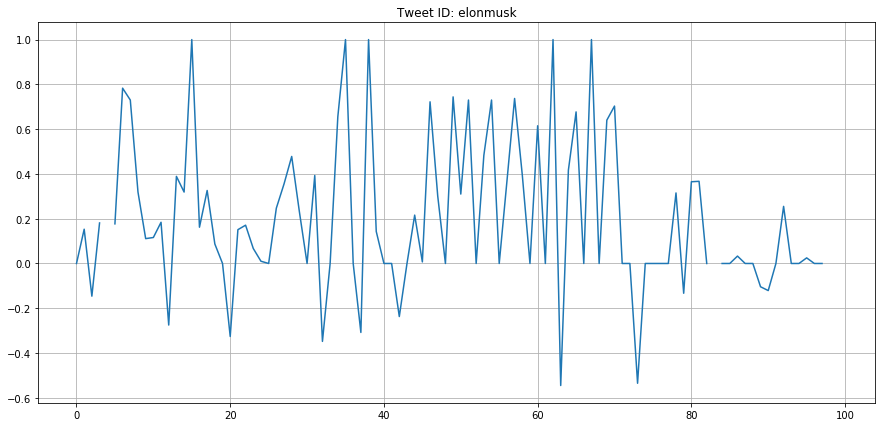

In [48]:
tw_id = 'elonmusk'
ntweets = 100
ts_sentiment = MakeTweetsTS_by_id(tw_id, ntweets)

figure(figsize=(15,7))
plot(ts_sentiment)
title('Tweet ID: ' + tw_id)
grid()

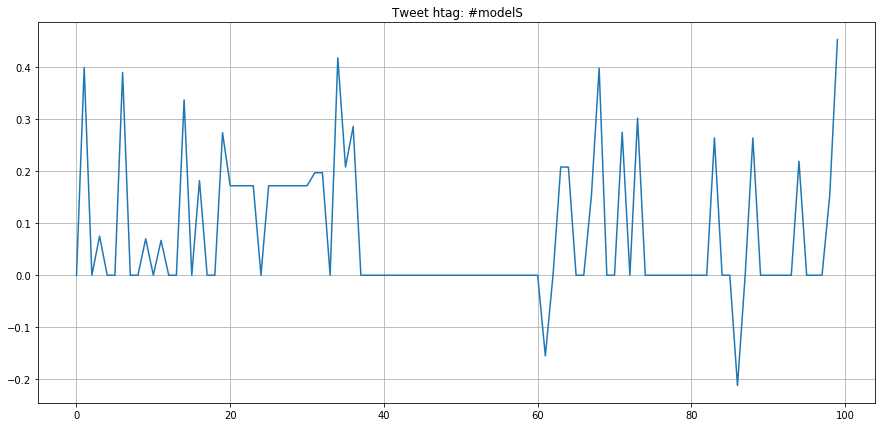

In [74]:
htag = '#modelS'
ntweets = 100
ts_sentiment = MakeTweetsTS_by_htag(htag, ntweets)

figure(figsize=(15,7))
plot(ts_sentiment)
title('Tweet htag: ' + htag)
grid()

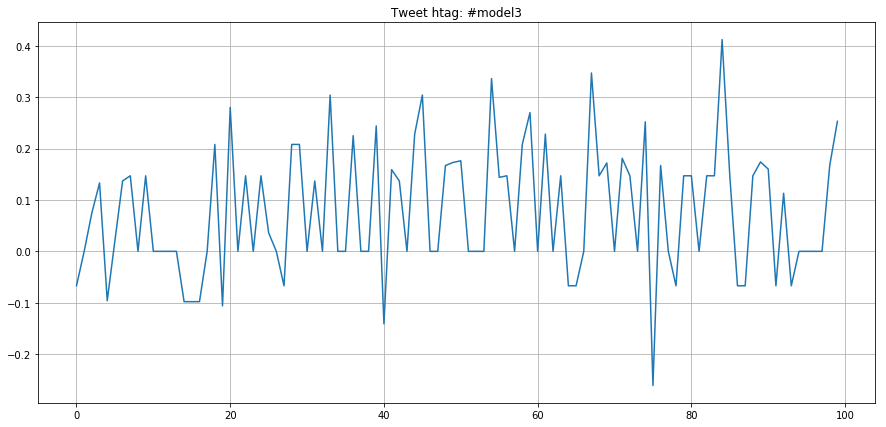

In [75]:
htag = '#model3'
ntweets = 100
ts_sentiment = MakeTweetsTS_by_htag(htag, ntweets)

figure(figsize=(15,7))
plot(ts_sentiment)
title('Tweet htag: ' + htag)
grid()

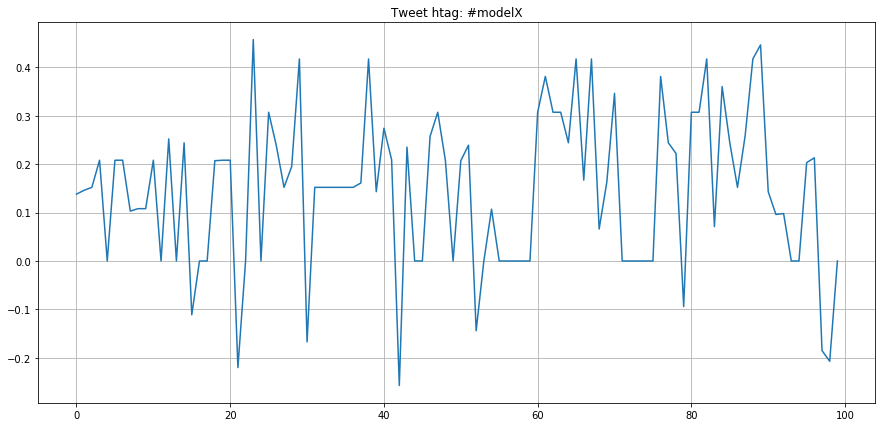

In [76]:
htag = '#modelX'
ntweets = 100
ts_sentiment = MakeTweetsTS_by_htag(htag, ntweets)

figure(figsize=(15,7))
plot(ts_sentiment)
title('Tweet htag: ' + htag)
grid()

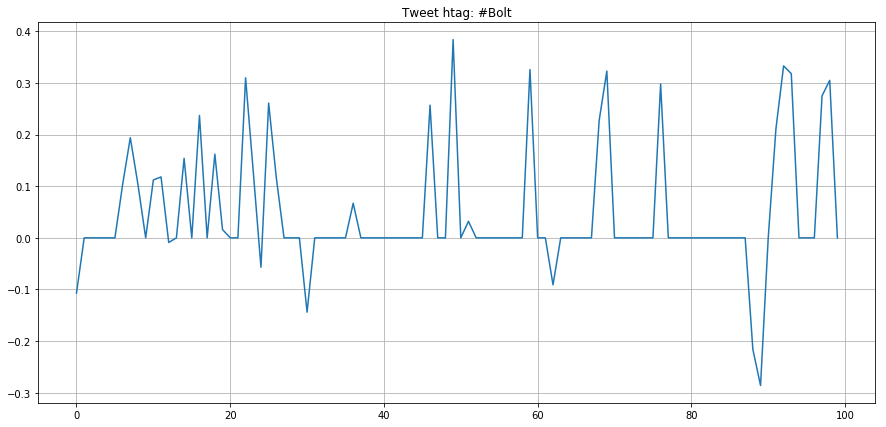

In [78]:
htag = '#Bolt'
ntweets = 100
ts_sentiment = MakeTweetsTS_by_htag(htag, ntweets)

figure(figsize=(15,7))
plot(ts_sentiment)
title('Tweet htag: ' + htag)
grid()